In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Dataset

In [2]:
BASE_DIR_PATH = '/Users/neilb/Documents/dsci_thesis/Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, 'compiled_data_2016_2017.csv')

In [3]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,index,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x
0,0,0,0,1,2,0,0,12.18,21.03,21.033407,14.842428,803.88,630.9,0.026165,0.023526,2016-01-01 00:00:00,0.0,14420
1,1,1,0,1,1,1,0,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 01:00:00,3600.0,14420
2,2,2,1,1,1,0,1,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 02:00:00,7200.0,14420
3,3,3,0,0,0,1,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 03:00:00,10800.0,14420
4,4,4,1,1,1,0,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 04:00:00,14400.0,14420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17515,16059,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 19:00:00,63140400.0,14420
17516,17516,16424,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 20:00:00,63144000.0,14420
17517,17517,16789,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 21:00:00,63147600.0,14420
17518,17518,17154,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 22:00:00,63151200.0,14420


In [4]:
df = df.iloc[:,2:]
df.head()

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x
0,0,1,2,0,0,12.18,21.03,21.033407,14.842428,803.88,630.9,0.026165,0.023526,2016-01-01 00:00:00,0.0,14420
1,0,1,1,1,0,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 01:00:00,3600.0,14420
2,1,1,1,0,1,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 02:00:00,7200.0,14420
3,0,0,0,1,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 03:00:00,10800.0,14420
4,1,1,1,0,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 04:00:00,14400.0,14420


In [5]:
n = len(df)

df['friction_coeff'] = [0.033 for i in range(n)]
df['slope'] = [1/1500 for i in range(n)]
df.head()

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,friction_coeff,slope
0,0,1,2,0,0,12.18,21.03,21.033407,14.842428,803.88,630.9,0.026165,0.023526,2016-01-01 00:00:00,0.0,14420,0.033,0.000667
1,0,1,1,1,0,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 01:00:00,3600.0,14420,0.033,0.000667
2,1,1,1,0,1,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 02:00:00,7200.0,14420,0.033,0.000667
3,0,0,0,1,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 03:00:00,10800.0,14420,0.033,0.000667
4,1,1,1,0,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 04:00:00,14400.0,14420,0.033,0.000667


In [6]:
# summary statistics
df.describe()

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,t,x,friction_coeff,slope
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,1.752000e+04,17520.0,1.752000e+04,1.752000e+04
mean,0.285959,0.278938,0.279281,0.293493,0.271404,12.345012,21.169086,32.110082,23.162453,814.770799,635.072567,0.037592,3.508409e-02,3.161362e+07,14420.0,3.300000e-02,6.666667e-04
std,2.068182,2.052007,1.926654,2.139718,2.181560,0.617530,0.607601,44.858760,72.735356,40.756974,18.228042,0.043011,9.202094e-02,1.821897e+07,0.0,5.981497e-15,2.140276e-16
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.100000,10.780000,4.940753,0.000174,732.600000,323.400000,0.006744,5.378524e-07,0.000000e+00,14420.0,3.300000e-02,6.666667e-04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,11.870000,20.910000,14.450867,13.172093,783.420000,627.300000,0.018446,2.099808e-02,1.585350e+07,14420.0,3.300000e-02,6.666667e-04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,12.270000,21.070000,23.338258,15.444064,809.820000,632.100000,0.028819,2.443294e-02,3.162060e+07,14420.0,3.300000e-02,6.666667e-04
75%,0.000000,0.000000,0.000000,0.000000,0.000000,12.590000,21.420000,33.231301,21.836840,830.940000,642.600000,0.039992,3.398201e-02,4.738770e+07,14420.0,3.300000e-02,6.666667e-04
max,67.000000,74.000000,58.000000,62.000000,129.000000,17.390000,27.480000,1149.013599,6231.876523,1147.740000,824.400000,1.001110,7.559287e+00,6.315480e+07,14420.0,3.300000e-02,6.666667e-04


array([[<AxesSubplot:title={'center':'Rainfall_Aries'}>,
        <AxesSubplot:title={'center':'Rainfall_Boso'}>],
       [<AxesSubplot:title={'center':'Rainfall_Campana'}>,
        <AxesSubplot:title={'center':'Rainfall_Nangka'}>],
       [<AxesSubplot:title={'center':'Rainfall_Oro'}>, <AxesSubplot:>]],
      dtype=object)

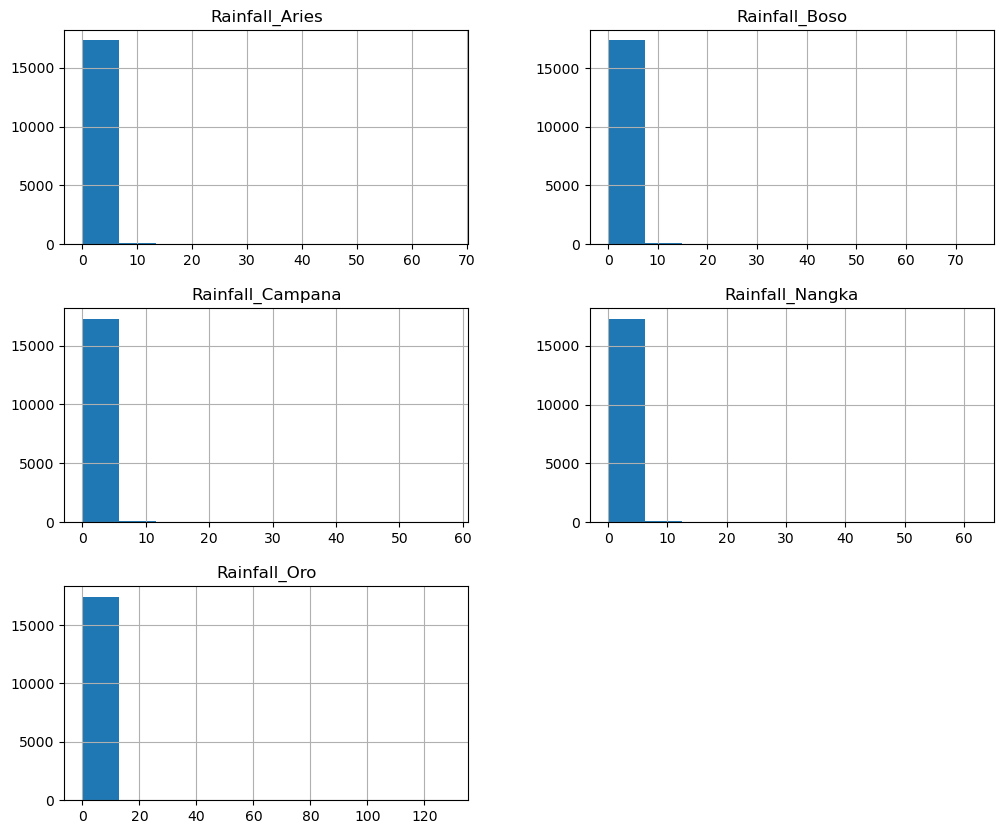

In [7]:
df.iloc[:,:5].hist(figsize=(12,10))

<AxesSubplot:>

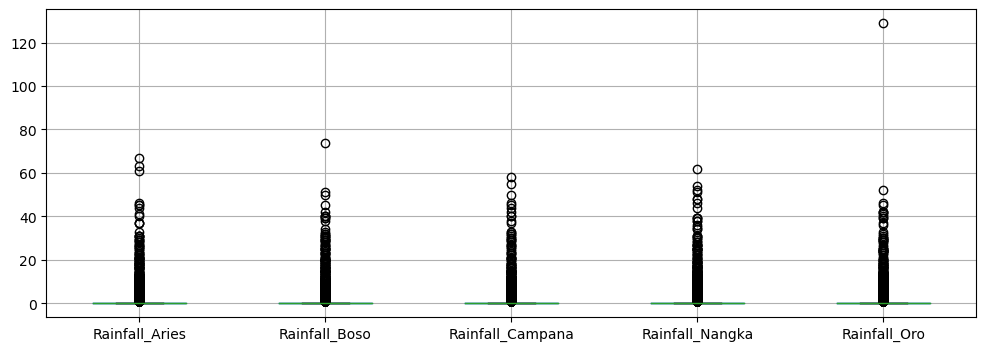

In [8]:
df.iloc[:,:5].boxplot(figsize=(12,4))

<AxesSubplot:>

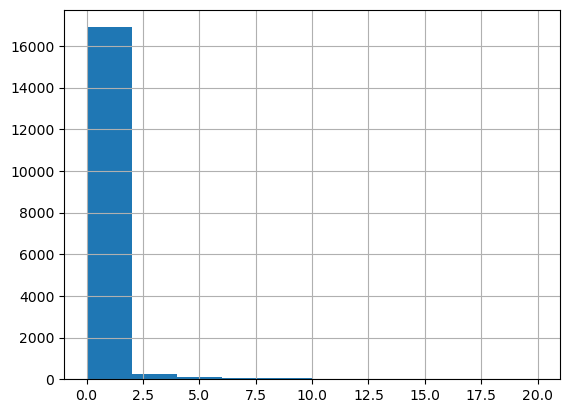

In [13]:
df.loc[df['Rainfall_Aries'] <= 20]['Rainfall_Aries'].hist()

<AxesSubplot:>

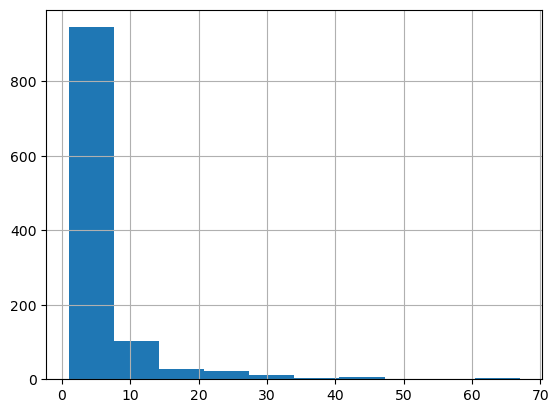

In [14]:
df.loc[df['Rainfall_Aries'] > 0]['Rainfall_Aries'].hist()

<AxesSubplot:>

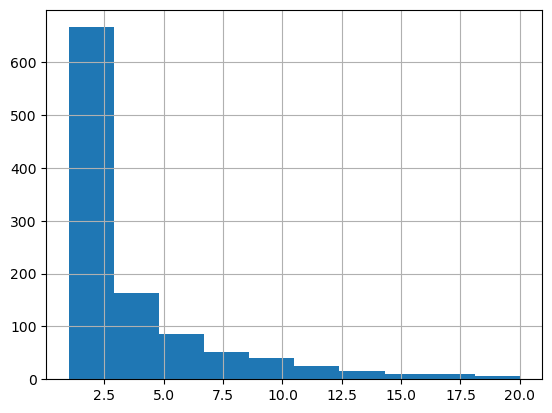

In [18]:
df.loc[df['Rainfall_Aries'] > 0].loc[df['Rainfall_Aries'] <= 20]['Rainfall_Aries'].hist()

array([[<AxesSubplot:title={'center':'Waterlevel_Sto_Nino'}>,
        <AxesSubplot:title={'center':'Waterlevel_Montalban'}>]],
      dtype=object)

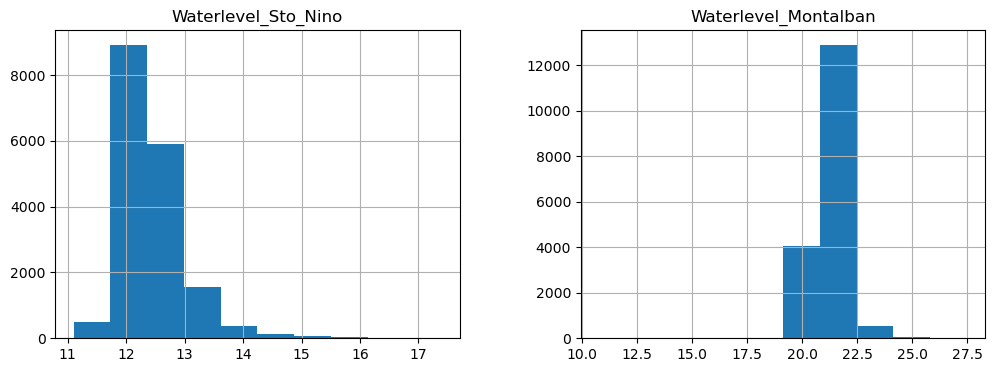

In [26]:
df[['Waterlevel_Sto_Nino', 'Waterlevel_Montalban']].hist(figsize=(12,4))

<AxesSubplot:>

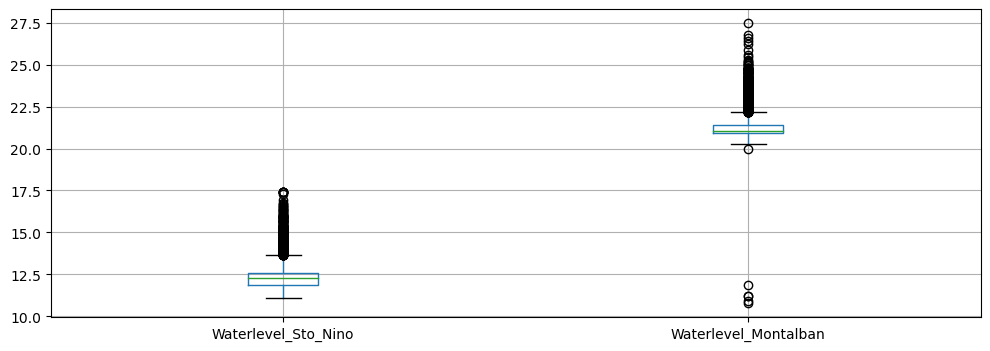

In [32]:
df[['Waterlevel_Sto_Nino', 'Waterlevel_Montalban']].boxplot(figsize=(12,4))

<AxesSubplot:>

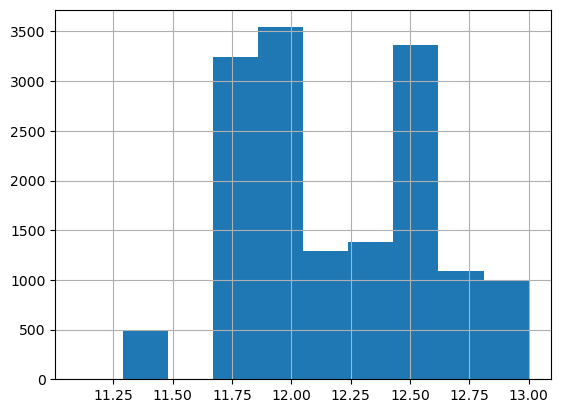

In [22]:
df.loc[df['Waterlevel_Sto_Nino'] <= 13]['Waterlevel_Sto_Nino'].hist()

<AxesSubplot:>

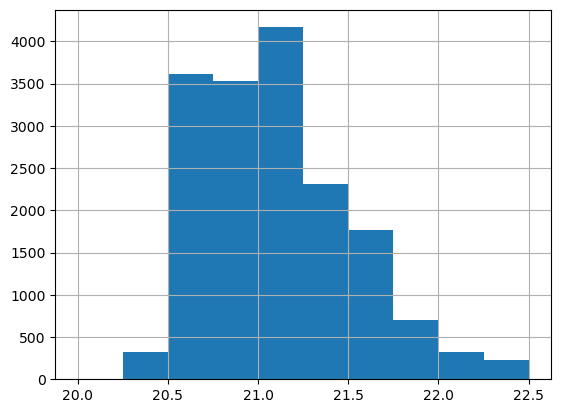

In [24]:
df.loc[df['Waterlevel_Montalban'] <= 22.5].loc[df['Waterlevel_Montalban'] > 15]['Waterlevel_Montalban'].hist()

array([[<AxesSubplot:title={'center':'Discharge_Sto_Nino'}>,
        <AxesSubplot:title={'center':'Discharge_San_Jose'}>]],
      dtype=object)

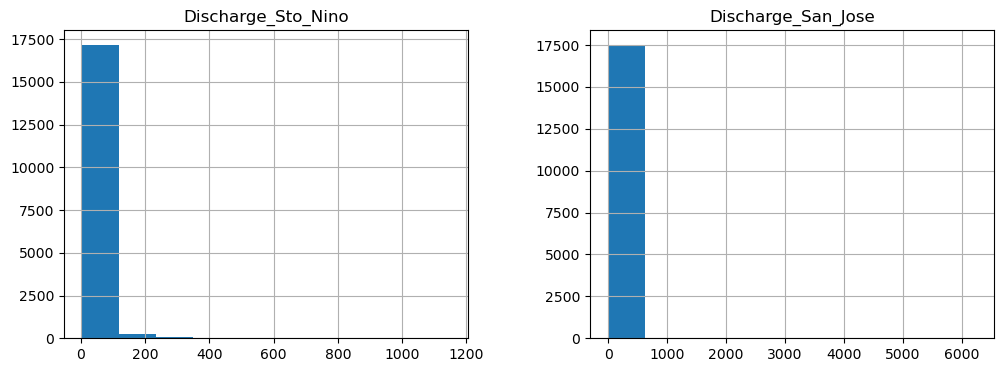

In [27]:
df[['Discharge_Sto_Nino', 'Discharge_San_Jose']].hist(figsize=(12,4))

<AxesSubplot:>

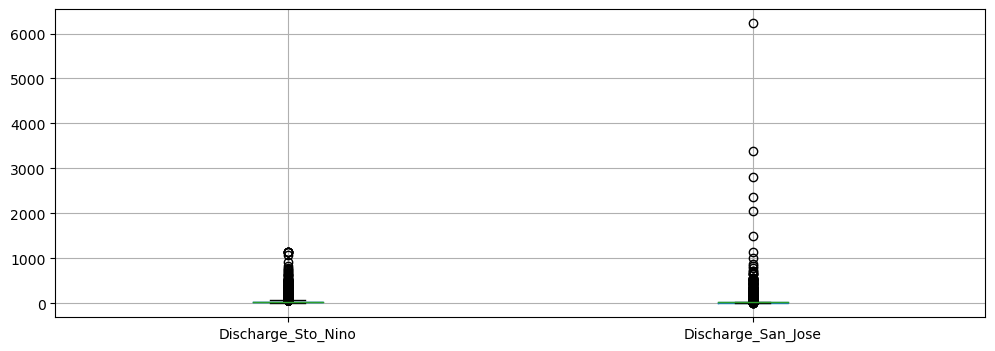

In [34]:
df[['Discharge_Sto_Nino', 'Discharge_San_Jose']].boxplot(figsize=(12,4))

<AxesSubplot:>

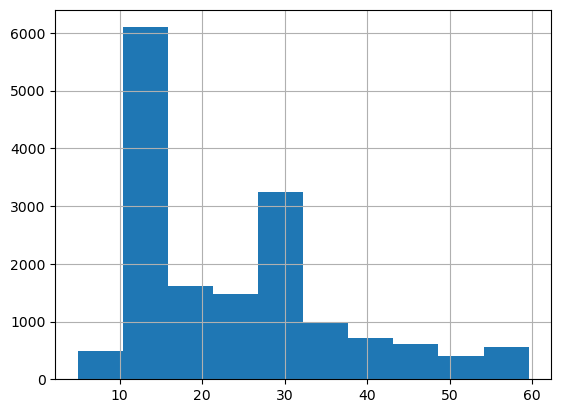

In [27]:
df.loc[df['Discharge_Sto_Nino'] <= 60]['Discharge_Sto_Nino'].hist()

<AxesSubplot:>

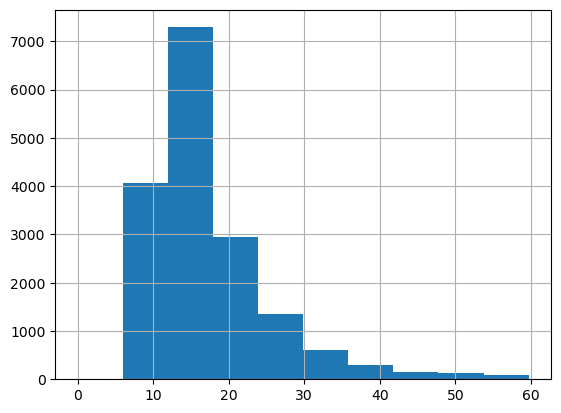

In [33]:
df.loc[df['Discharge_San_Jose'] <= 60]['Discharge_San_Jose'].hist()

array([[<AxesSubplot:title={'center':'Velocity_Sto_Nino'}>,
        <AxesSubplot:title={'center':'Velocity_Montalban'}>]],
      dtype=object)

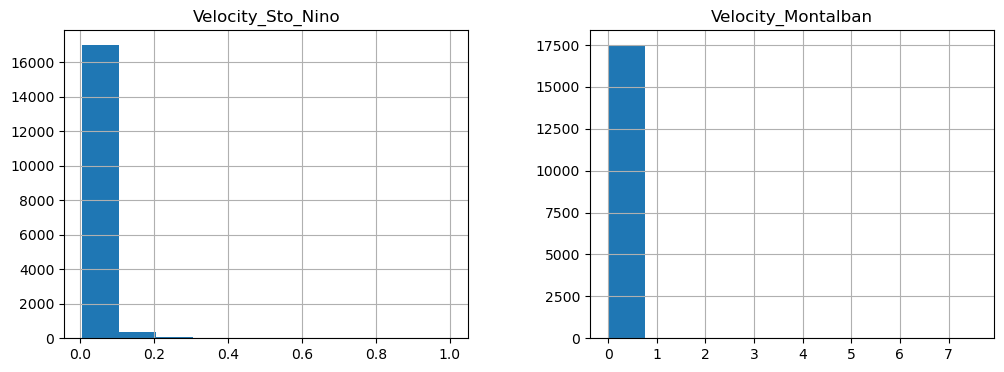

In [29]:
df[['Velocity_Sto_Nino', 'Velocity_Montalban']].hist(figsize=(12,4))

<AxesSubplot:>

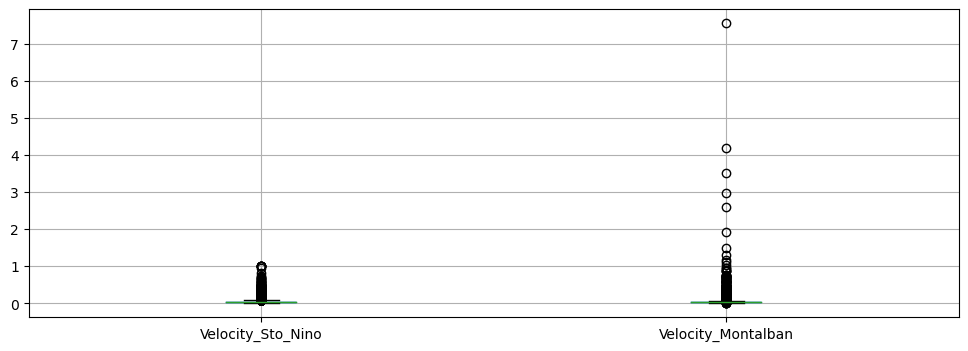

In [35]:
df[['Velocity_Sto_Nino', 'Velocity_Montalban']].boxplot(figsize=(12,4))

<AxesSubplot:>

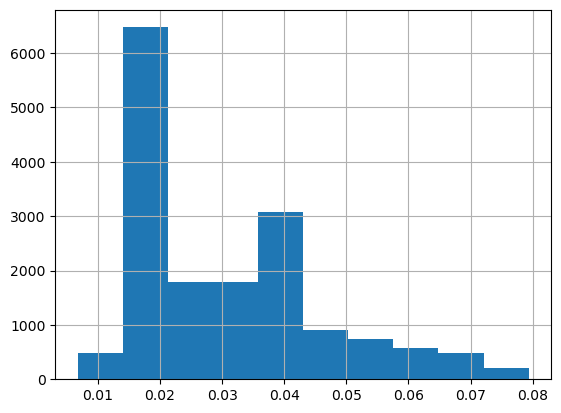

In [39]:
df.loc[df['Velocity_Sto_Nino'] <= 0.08]['Velocity_Sto_Nino'].hist()

<AxesSubplot:>

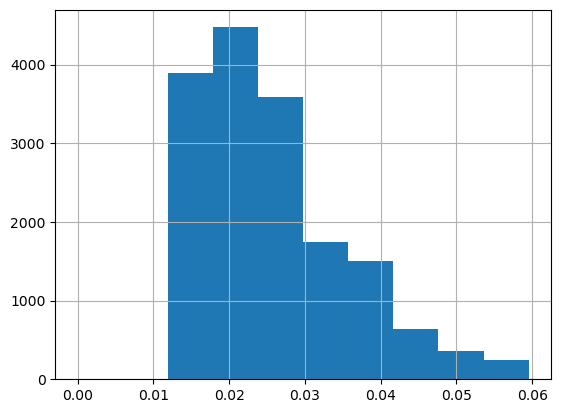

In [40]:
df.loc[df['Velocity_Montalban'] <= 0.06]['Velocity_Montalban'].hist()

## Functions

In [6]:
def make_corr_heatmap(dataframe):
    '''
    Making a correlation heatmap for dataframe
    '''
    corr_matrix = dataframe.corr()
    corr_heatmap = sns.heatmap(corr_matrix, annot=True)
    plt.show()

## Correlation

In [4]:
df = df[['x', 't', 'Discharge_Sto_Nino', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Waterlevel_Sto_Nino', 'Velocity_Sto_Nino', 'friction_coeff', 'slope']]
df.head()

,x,t,Discharge_Sto_Nino,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Velocity_Sto_Nino
0,14420,0.0,21.033407,0,1,2,0,0,12.18,0.026165
1,14420,3600.0,21.280072,0,1,1,1,0,12.19,0.026450
2,14420,7200.0,21.280072,1,1,1,0,1,12.19,0.026450
3,14420,10800.0,21.529056,0,0,0,1,0,12.20,0.026738
4,14420,14400.0,21.529056,1,1,1,0,0,12.20,0.026738


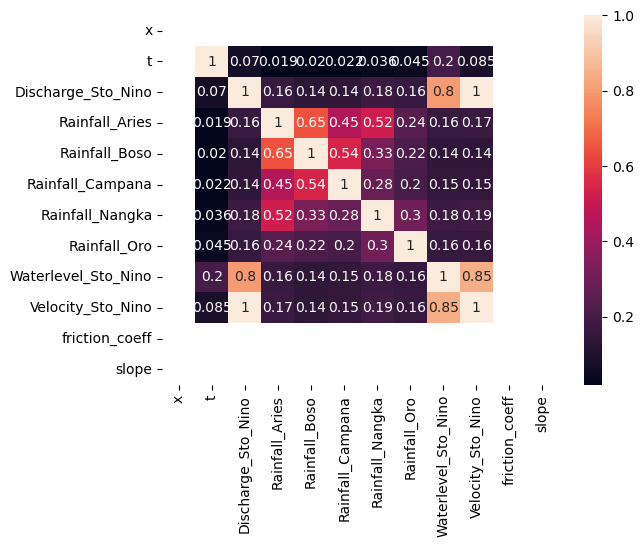

In [7]:
make_corr_heatmap(df)

In [8]:
df.corr()

,x,t,Discharge_Sto_Nino,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Velocity_Sto_Nino,friction_coeff,slope
x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t,NaN,1.000000,0.070032,0.018782,0.019951,0.022026,0.035632,0.044564,0.198083,0.084897,NaN,NaN
Discharge_Sto_Nino,NaN,0.070032,1.000000,0.164771,0.135611,0.144100,0.178539,0.158425,0.800133,0.996385,NaN,NaN
Rainfall_Aries,NaN,0.018782,0.164771,1.000000,0.646415,0.448230,0.522804,0.241820,0.164625,0.170628,NaN,NaN
Rainfall_Boso,NaN,0.019951,0.135611,0.646415,1.000000,0.542930,0.326981,0.216151,0.141357,0.140913,NaN,NaN
Rainfall_Campana,NaN,0.022026,0.144100,0.448230,0.542930,1.000000,0.281672,0.204171,0.152035,0.149749,NaN,NaN
Rainfall_Nangka,NaN,0.035632,0.178539,0.522804,0.326981,0.281672,1.000000,0.304613,0.177892,0.185073,NaN,NaN
Rainfall_Oro,NaN,0.044564,0.158425,0.241820,0.216151,0.204171,0.304613,1.000000,0.156784,0.164336,NaN,NaN
Waterlevel_Sto_Nino,NaN,0.198083,0.800133,0.164625,0.141357,0.152035,0.177892,0.156784,1.000000,0.845022,NaN,NaN
Velocity_Sto_Nino,NaN,0.084897,0.996385,0.170628,0.140913,0.149749,0.185073,0.164336,0.845022,1.000000,NaN,NaN


#### Findings
Feature to Feature
- variables with constant values (x, friction coefficient, slope) have no correlation with other variables
- rainfall in mt aries is highly correlated with rainfall in boso boso and nangka, rainfall in mt campana is highly correlated with rainfall in boso boso

Feature to Output
- discharge is highly correlated with water level and velocity, velocity is highly correlated with water level; problem: discharge is derived from water level and velocity is derived from discharge
- rainfall is only weakly correlated with water level and velocity
- t has weak correlation with water level and velocity